In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("12-health_risk_classification.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

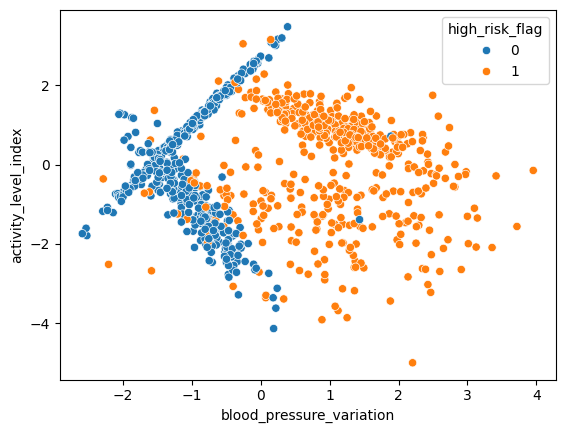

In [14]:
sns.scatterplot(df, x="blood_pressure_variation", y="activity_level_index", hue="high_risk_flag")

In [15]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [16]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classifier = KNeighborsClassifier()

<Axes: >

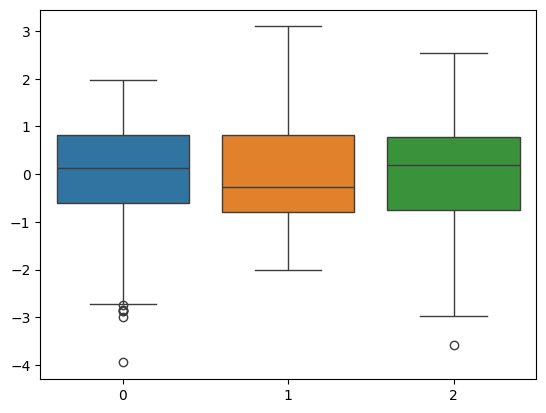

In [24]:
sns.boxplot(X_train_scaled)

In [25]:
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.952
[[124   2]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [28]:
df_reg = pd.read_csv("12-house_energy_regression.csv")

<Axes: >

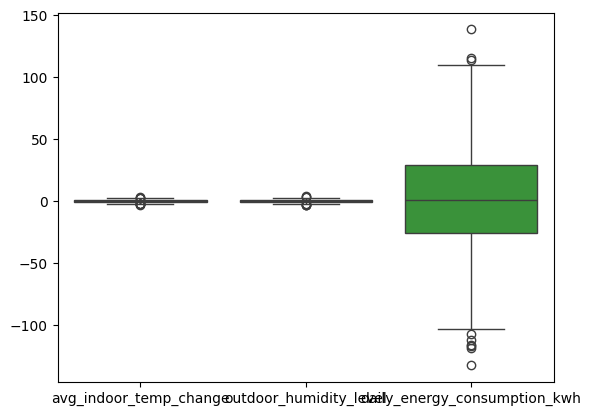

In [29]:
sns.boxplot(df_reg)

In [30]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


<Axes: xlabel='avg_indoor_temp_change', ylabel='outdoor_humidity_level'>

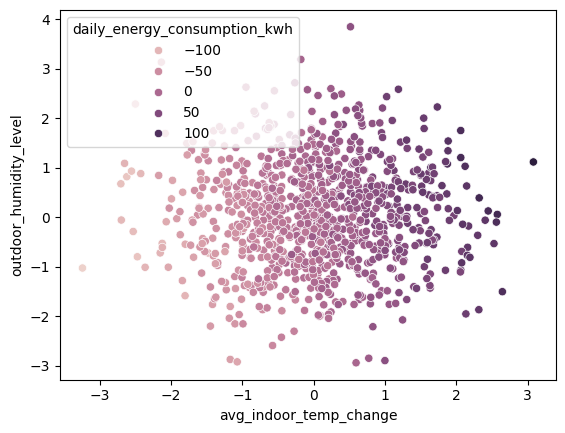

In [33]:
sns.scatterplot(df_reg, x="avg_indoor_temp_change", y="outdoor_humidity_level",hue="daily_energy_consumption_kwh")

In [34]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

137.54938006164943
9.329789699164268
0.917173862980986
